# ***Proyecto:* Preparación de Datos con Python**

## **Lección 1 - *La librería NumPy***

🎯 Objetivo: Crear un conjunto de datos ficticio utilizando NumPy, aplicando operaciones básicas para la preparación inicial.

In [1]:
# Importar las librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Generar datos ficticios de clientes y transacciones utilizando arrays de NumPy.

In [2]:
# Cantidad de clientes
num_clientes = 50

# IDs de clientes
clientes_id = np.arange(1, num_clientes + 1)

# Edades aleatorias (18 a 75 años)
edades = np.random.randint(18, 75, num_clientes)

# Monto de compras aleatorias ($ 5.000 a $ 1.200.000)
compras = np.random.randint(100000, 1200000, num_clientes)

# Cantidad de transacciones por cliente
transacciones = np.random.randint(1, 20, num_clientes)

2. Aplicar operaciones matemáticas básicas (suma, media, conteo, etc.).

In [3]:
total_ventas = np.sum(compras)
print("Total ventas: $", int(total_ventas))

promedio_ventas = np.mean(compras)
print("Promedio venta: $", int(promedio_ventas))

max_venta = np.max(compras)
print("Venta máxima: $", int(max_venta))

min_venta = np.min(compras)
print("Venta mínima: $", int(min_venta))

total_transacciones = np.sum(transacciones)
print("Total transacciones:", int(total_transacciones))

Total ventas: $ 30782490
Promedio venta: $ 615649
Venta máxima: $ 1194594
Venta mínima: $ 129333
Total transacciones: 459


3. Guardar los datos generados en un archivo .npy, o

In [118]:
datos = {
    "id": clientes_id,
    "edad": edades,
    "compras": compras,
    "transacciones": transacciones
}

np.save("datos_clientes.npy", datos)

...convertirlos a listas para usarlos luego en Pandas.

In [5]:
id_lista = clientes_id.tolist()
edad_lista = edades.tolist()
compras_lista = compras.tolist()
transacciones_lista = transacciones.tolist()

4. Explicar en un breve documento por qué NumPy es eficiente para el manejo de datos numéricos.

NumPy (Numerical Python) es una biblioteca especializada en el manejo de datos numéricos en Python. 

Esta permite crear y manipular arreglos multidimensionales y matrices de manera eficiente, facilitando operaciones matemáticas y estadísticas complejas. 

Una característica clave de NumPy es su **integración con otras bibliotecas** populares como Pandas, Matplotlib y Scikit-learn. Estas librerías dependen de NumPy para manejar datos de manera eficiente, lo que lo convierte en un pilar fundamental dentro del ecosistema de ciencia de datos en Python.

Otra ventaja de NumPy es su capacidad para manejar **operaciones vectorizadas**. Esto significa que se pueden realizar cálculos matemáticos sobre conjuntos de datos completos sin necesidad de escribir bucles, lo que mejora la legibilidad del código y la eficiencia computacional.

## **Lección 2 - *La librería Pandas***

🎯 Objetivo: Explorar y transformar los datos generados en la Lección 1, utilizando la estructura de DataFrame de Pandas.

1. Leer los datos preparados en NumPy y convertirlos en un DataFrame.

In [ ]:
import pandas as pd

# Crear DataFrame con los datos generados
df = pd.DataFrame({
    "id": id_lista,
    "edad": edad_lista,
    "compras": compras_lista,
    "transacciones": transacciones_lista
})

df

In [ ]:
df.to_csv("datos_clientes.csv", index=False, encoding="utf-8")

2. Realizar una exploración inicial:

- Visualizar primeras y últimas filas.

In [44]:
# Primeras filas del DataFrame
df.head()

,id,edad,compras,transacciones
0,1,25,778688,9
1,2,50,404123,19
2,3,43,1145256,18
3,4,28,784209,5
4,5,35,1179103,3


In [45]:
# Últimas filas del DataFrame
df.tail()

,id,edad,compras,transacciones
45,46,62,786470,2
46,47,67,377462,6
47,48,66,297150,18
48,49,71,363529,2
49,50,31,724322,2


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             50 non-null     int64
 1   edad           50 non-null     int64
 2   compras        50 non-null     int64
 3   transacciones  50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


- Obtener estadísticas descriptivas.

In [47]:
df.describe()

,id,edad,compras,transacciones
count,50.00000,50.000000,5.000000e+01,50.000000
mean,25.50000,48.300000,6.156498e+05,9.180000
std,14.57738,16.870757,3.347717e+05,5.836864
min,1.00000,18.000000,1.293330e+05,1.000000
25%,13.25000,34.000000,3.412535e+05,5.000000
50%,25.50000,49.500000,5.928780e+05,9.000000
75%,37.75000,64.000000,8.734160e+05,13.000000
max,50.00000,74.000000,1.194594e+06,19.000000


In [48]:
# Sumar Columnas 'Compras' y 'Transacciones'
suma_compras = df['compras'].sum()
suma_transacciones = df['transacciones'].sum()

print("Suma total de compras: $", suma_compras)
print("Suma total de transacciones:", suma_transacciones)

Suma total de compras: $ 30782490
Suma total de transacciones: 459


- Aplicar filtros condicionales.

In [49]:
# Filtrar clientes en un rango de monto de compra ingresado por el usuario
valor_min = int(input("Ingrese un valor mínimo en números para filtrar compras: "))
valor_max = int(input("Ingrese un valor máximo en números para filtrar compras: "))
compras_rango_filtradas = df[(df["compras"] >= valor_min) & (df["compras"] <= valor_max)]

print("Detalle de clientes con compras entre $", valor_min, "y $", valor_max)
compras_rango_filtradas

Detalle de clientes con compras entre $ 1000000 y $ 12000000


,id,edad,compras,transacciones
2,3,43,1145256,18
4,5,35,1179103,3
12,13,73,1012396,7
14,15,34,1077791,16
20,21,70,1187491,7
22,23,44,1191906,11
28,29,61,1194594,1
30,31,66,1018570,8
42,43,63,1107411,2


In [50]:
# Sumar Columnas Filtradas 'Compras' y 'Transacciones'
numero_clientes_compras_rango_filtradas = len(compras_rango_filtradas)
print("Número de clientes filtrados en el rango:", numero_clientes_compras_rango_filtradas)
print("Porcentaje de número de clientes filtrados en el rango: ", round((numero_clientes_compras_rango_filtradas / len(df)) * 100,2), "%")

suma_compras_filtrada = compras_rango_filtradas['compras'].sum()
print("\nSuma total de compras filtradas: $", suma_compras_filtrada)
print("Porcentaje del total de compras filtradas: ", round((suma_compras_filtrada / suma_compras) * 100,2), "%")

suma_transacciones_filtrada = compras_rango_filtradas['transacciones'].sum()
print("\nSuma total de transacciones filtradas:", suma_transacciones_filtrada)
print("Porcentaje del total de transacciones filtradas: ", round((suma_transacciones_filtrada / suma_transacciones) * 100,2), "%")

Número de clientes filtrados en el rango: 9
Porcentaje de número de clientes filtrados en el rango:  18.0 %

Suma total de compras filtradas: $ 10114518
Porcentaje del total de compras filtradas:  32.86 %

Suma total de transacciones filtradas: 73
Porcentaje del total de transacciones filtradas:  15.9 %


In [51]:
# Filtrar clientes con una cantidad de transacciones ingresada por el usuario
min_t = int(input("Ingrese mínimo de transacciones: "))
max_t = int(input("Ingrese máximo de transacciones: "))

clientes_rango = df[
    (df["transacciones"] >= min_t) &
    (df["transacciones"] <= max_t)
]

print(f"\nTotal encontrados: {len(clientes_rango)}")

print(f"\nDetalle de clientes con transacciones entre {min_t} y {max_t}:")
clientes_rango


Total encontrados: 3

Detalle de clientes con transacciones entre 1 y 1:


,id,edad,compras,transacciones
24,25,30,639868,1
28,29,61,1194594,1
32,33,19,488693,1


In [52]:
# Cuenta la cantidad de clientes por número de transacciones
conteo_transacciones = df["transacciones"].value_counts().sort_index()
print("Cantidad de clientes por número de transacciones:")
conteo_transacciones

Cantidad de clientes por número de transacciones:


transacciones
1     3
2     5
3     4
5     5
6     3
7     3
8     1
9     4
10    1
11    4
12    3
13    2
15    2
16    2
18    4
19    4
Name: count, dtype: int64

In [53]:
# Cuenta la cantidad de clientes por rango de edad
# Rangos de edad
bins = [17, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']
df['rango_edad'] = pd.cut(df['edad'], bins=bins, labels=labels)

# Conteo de clientes por rango de edad
conteo_rango_edad = df['rango_edad'].value_counts().sort_index()

print("Total de Clientes:", len(df))
print("\nCantidad de clientes por rango de edad:")
conteo_rango_edad

Total de Clientes: 50

Cantidad de clientes por rango de edad:


rango_edad
18-24     4
25-34    11
35-44     9
45-54     6
55-64    10
65-74    10
Name: count, dtype: int64

In [54]:
# Suma de compras por rango de edad
suma_compras_rango_edad = (df.groupby("rango_edad", observed=True)["compras"].sum())
print("\nSuma de compras por rango de edad:")
suma_compras_rango_edad


Suma de compras por rango de edad:


rango_edad
18-24    1591560
25-34    6522132
35-44    6420549
45-54    2549335
55-64    7534447
65-74    6164467
Name: compras, dtype: int64

3. Guardar el DataFrame preliminar en un archivo CSV para ser utilizado en la siguiente lección.

In [55]:
df.to_csv("clientes_transacciones.csv", index=False)

4. Redactar un documento breve describiendo los hallazgos y la utilidad de Pandas para la manipulación de datos.

Pandas es ampliamente utilizada en la manipulación y análisis de datos provenientes de diferentes fuentes, como archivos CSV, Excel, bases de datos SQL y JSON. Esta demostró ser una herramienta altamente eficiente para la manipulación de datos, ya que permite la carga y limpieza de datos, transformación de datos, análisis estadístico, filtrado y selección de datos, entre otras caracteristicas.

La exploración inicial del DataFrame permitió verificar la correcta carga y estructura de los datos, identificando las variables correspondientes a identificación del cliente, edad, monto de compras y número de transacciones.

Entre los hallazgos encontrados se observa que el DataFrame cuenta con datos de 50 clientes. No presenta valores nulos en ninguna de sus cuatro columnas: 'ID', 'Edad', 'Compras' y 'Transacciones'. 

El análisis descriptivo mostró la distribución general de las variables y permitió identificar el comportamiento promedio del monto de compras. La comparación entre la media y la desviación estándar ayudó a detectar clientes que se alejan significativamente del comportamiento promedio, considerados como posibles valores atípicos.

Al aplicar filtros condicionales, se identificó:

- Un grupo reducido de 9 clientes con compras superiores a \$1.000.000. Este segmento representa el 18\% del total de clientes, pero concentra una parte relevante del volumen total de ventas (\$10.114.518, equivalente al 32,86\% del total de compras), lo que los posiciona como clientes estratégicos.

- Mientras algunos clientes presentan una sola transacción, otros muestran una frecuencia considerablemente mayor, lo que sugiere distintos niveles de fidelización. Esto puede ser útil para orientar estrategias de marketing de retención.

- La segmentación por rangos de edad permitió identificar diferencias en el comportamiento de compra. Algunos rangos presentan mayores montos de compra promedio, lo que puede ser útil para orientar estrategias comerciales o campañas dirigidas.

## **Lección 3 - *Obtención de datos desde archivos***

🎯 Objetivo: Integrar datos de diversas fuentes y unificarlos en un solo DataFrame para su posterior limpieza.

1. Cargar el archivo CSV generado en la Lección 2.

In [168]:
clientes_transacciones = pd.read_csv('clientes_transacciones.csv', sep=',', encoding='utf-8')
clientes_transacciones

,id,edad,compras,transacciones,rango_edad
0,1,25,778688,9,18-24
1,2,50,404123,19,45-54
2,3,43,1145256,18,35-44
3,4,28,784209,5,25-34
4,5,35,1179103,3,25-34
5,6,29,210031,11,25-34
6,7,73,516202,7,65-74
7,8,61,135077,6,55-64
8,9,20,131943,15,18-24
9,10,36,770686,2,35-44


Como este DataFrame fue creado al azar, no cuenta con filas duplicadas. Así que serán creadas ahora:

In [169]:
# Duplicar las primeras 2 filas
df_duplicado = pd.concat([clientes_transacciones, clientes_transacciones.head(2)], ignore_index=True)

# Seleccionar 2 filas aleatorias
df_duplicado = pd.concat([df_duplicado, df_duplicado.sample(2)], ignore_index=True)

# Verificar el resultado
df_duplicado.tail()

,id,edad,compras,transacciones,rango_edad
49,50,31,724322,2,25-34
50,1,25,778688,9,18-24
51,2,50,404123,19,45-54
52,37,58,422379,13,55-64
53,15,34,1077791,16,25-34


2. Incorporar nuevas fuentes de datos:
- Leer un archivo Excel con información complementaria.

In [170]:
info_clientes = pd.read_excel('Detalle de Datos de Clientes vf.xlsx', sheet_name='Datos')
info_clientes

,id,Nombre,Comuna,Sector
0,1,Estrella Sevilla,Las Condes,Nororiente (Sector Oriente)
1,2,Brigida Guijarro,El Bosque,Sur
2,3,Julia Andres,NaN,NaN
3,4,Marwa Zheng,Estación Central,Centro
4,5,Valentin Burgos,Providencia,Nororiente (Sector Oriente)
5,6,Rachid Palomares,Lo Espejo,Sur
6,7,Eduard Molinero,Vitacura,Nororiente (Sector Oriente)
7,8,Azucena Cantero,Macul,Suroriente
8,9,Mateo Beltran,Maipú,Surponiente
9,10,Patricio Leiva,NaN,NaN


In [171]:
info_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      50 non-null     int64 
 1   Nombre  48 non-null     object
 2   Comuna  46 non-null     object
 3   Sector  46 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


- Extraer datos de una tabla web usando read_html().

In [172]:
import requests
from io import StringIO  # Importamos StringIO para tratar el HTML como un archivo

url = 'https://es.wikipedia.org/wiki/Anexo:Comunas_de_Chile'

# Crear los encabezados para simular un navegador
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Realizar la solicitud con el encabezado
response = requests.get(url, headers=headers)

# Usamos StringIO para convertir el HTML en un archivo "virtual"
html_content = StringIO(response.text)

# Leer la tabla desde el contenido HTML de la respuesta
cod_comuna = pd.read_html(html_content)

# Ver las primeras filas de la primera tabla
cod_comuna[0].head()

,CUT (Código Único Territorial),Nombre,Unnamed: 2,Provincia,Región,Superficie (km²),Población 2020,Densidad (hab./km²),IDH 2005,IDH 2005.1,Latitud,Longitud
0,15101,Arica,NaN,Arica,Arica y Parinacota,"4.799,4",247 552,51.6,0.866,Muy alto,"-18°27'18""","-70°17'24"""
1,15102,Camarones,NaN,Arica,Arica y Parinacota,3.927,1 233,0.31,0.791,Alto,"-19°1'1.2""","-69°52'1.2"""
2,15201,Putre,NaN,Parinacota,Arica y Parinacota,"5.902,5",2 515,0.43,0.817,Muy alto,"-18°12'0""","-69°34'58.8"""
3,15202,General Lagos,NaN,Parinacota,Arica y Parinacota,"2.244,4",810,0.36,0.773,Alto,"-17°39'10.8""","-69°38'6"""
4,1101,Iquique,NaN,Iquique,Tarapacá,"2.242,1",223 463,996,0.826,Muy alto,"-20°14'38.4""","-70°8'20.4"""


In [173]:
cod_comuna[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CUT (Código Único Territorial)  346 non-null    int64  
 1   Nombre                          346 non-null    object 
 2   Unnamed: 2                      0 non-null      float64
 3   Provincia                       346 non-null    object 
 4   Región                          346 non-null    object 
 5   Superficie (km²)                346 non-null    object 
 6   Población 2020                  346 non-null    object 
 7   Densidad (hab./km²)             346 non-null    object 
 8   IDH 2005                        343 non-null    float64
 9   IDH 2005.1                      346 non-null    object 
 10  Latitud                         346 non-null    object 
 11  Longitud                        346 non-null    object 
dtypes: float64(2), int64(1), object(9)
m

3. Unificar las diferentes fuentes de datos en un único DataFrame.

In [174]:
union1 = df_duplicado.merge(info_clientes, left_on='id', right_on='id', how='left')
union1

,id,edad,compras,transacciones,rango_edad,Nombre,Comuna,Sector
0,1,25,778688,9,18-24,Estrella Sevilla,Las Condes,Nororiente (Sector Oriente)
1,2,50,404123,19,45-54,Brigida Guijarro,El Bosque,Sur
2,3,43,1145256,18,35-44,Julia Andres,NaN,NaN
3,4,28,784209,5,25-34,Marwa Zheng,Estación Central,Centro
4,5,35,1179103,3,25-34,Valentin Burgos,Providencia,Nororiente (Sector Oriente)
5,6,29,210031,11,25-34,Rachid Palomares,Lo Espejo,Sur
6,7,73,516202,7,65-74,Eduard Molinero,Vitacura,Nororiente (Sector Oriente)
7,8,61,135077,6,55-64,Azucena Cantero,Macul,Suroriente
8,9,20,131943,15,18-24,Mateo Beltran,Maipú,Surponiente
9,10,36,770686,2,35-44,Patricio Leiva,NaN,NaN


In [175]:
union2 = union1.merge(cod_comuna[0], left_on='Comuna', right_on='Nombre', how='left')
union2

,id,edad,compras,transacciones,rango_edad,Nombre_x,Comuna,Sector,CUT (Código Único Territorial),Nombre_y,Unnamed: 2,Provincia,Región,Superficie (km²),Población 2020,Densidad (hab./km²),IDH 2005,IDH 2005.1,Latitud,Longitud
0,1,25,778688,9,18-24,Estrella Sevilla,Las Condes,Nororiente (Sector Oriente),13114.0,Las Condes,NaN,Santiago,Metropolitana de Santiago,99,330 759,3.341,0.933,Muy alto,"-33°25'0""","-70°35'0"""
1,2,50,404123,19,45-54,Brigida Guijarro,El Bosque,Sur,13105.0,El Bosque,NaN,Santiago,Metropolitana de Santiago,14.2,172 000,"12.285,7",0.711,Alto,"-33°34'1.2""","-70°40'30"""
2,3,43,1145256,18,35-44,Julia Andres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,28,784209,5,25-34,Marwa Zheng,Estación Central,Centro,13106.0,Estación Central,NaN,Santiago,Metropolitana de Santiago,15,206 792,"13.786,1",0.735,Alto,"-33°27'32.4""","-70°41'56.4"""
4,5,35,1179103,3,25-34,Valentin Burgos,Providencia,Nororiente (Sector Oriente),13123.0,Providencia,NaN,Santiago,Metropolitana de Santiago,14.3,157 749,"11.267,7",0.911,Muy alto,"-33°26'6""","-70°36'57.6"""
5,6,29,210031,11,25-34,Rachid Palomares,Lo Espejo,Sur,13116.0,Lo Espejo,NaN,Santiago,Metropolitana de Santiago,7,103 865,"14.837,8",0.657,Medio,"-33°31'19.2""","-70°41'13.2"""
6,7,73,516202,7,65-74,Eduard Molinero,Vitacura,Nororiente (Sector Oriente),13132.0,Vitacura,NaN,Santiago,Metropolitana de Santiago,28.3,96 774,"3.456,2",0.949,Muy alto,"-33°24'0""","-70°36'0"""
7,8,61,135077,6,55-64,Azucena Cantero,Macul,Suroriente,13118.0,Macul,NaN,Santiago,Metropolitana de Santiago,12.9,134 635,"10.356,5",0.806,Muy alto,"-33°29'13.2""","-70°36'14.4"""
8,9,20,131943,15,18-24,Mateo Beltran,Maipú,Surponiente,13119.0,Maipú,NaN,Santiago,Metropolitana de Santiago,135.5,578 605,"4.254,4",0.802,Muy alto,"-33°31'0""","-70°46'0"""
9,10,36,770686,2,35-44,Patricio Leiva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
# Renombrar de columnas
df1 = union2.rename(columns={'id': 'ID Cliente', 'edad': 'Edad', 'compras': 'Compras $', 'transacciones': 'N°de Transacciones', 'rango_edad': 'Rango de Edad', 'Nombre_x': 'Nombre Cliente', 'CUT (Código Único Territorial)': 'Cód. Comuna'})

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID Cliente           54 non-null     int64  
 1   Edad                 54 non-null     int64  
 2   Compras $            54 non-null     int64  
 3   N°de Transacciones   54 non-null     int64  
 4   Rango de Edad        54 non-null     object 
 5   Nombre Cliente       52 non-null     object 
 6   Comuna               50 non-null     object 
 7   Sector               50 non-null     object 
 8   Cód. Comuna          50 non-null     float64
 9   Nombre_y             50 non-null     object 
 10  Unnamed: 2           0 non-null      float64
 11  Provincia            50 non-null     object 
 12  Región               50 non-null     object 
 13  Superficie (km²)     50 non-null     object 
 14  Población 2020       50 non-null     object 
 15  Densidad (hab./km²)  50 non-null     objec

In [178]:
# Eliminar columnas innecesarias
df2 = df1.drop(columns=['Unnamed: 2', 'Superficie (km²)', 'Población 2020', 
                        'Densidad (hab./km²)', 'IDH 2005', 'IDH 2005.1', 
                        'Latitud', 'Nombre_y', 'Longitud'])

# Verificar las columnas del DataFrame limpio
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID Cliente          54 non-null     int64  
 1   Edad                54 non-null     int64  
 2   Compras $           54 non-null     int64  
 3   N°de Transacciones  54 non-null     int64  
 4   Rango de Edad       54 non-null     object 
 5   Nombre Cliente      52 non-null     object 
 6   Comuna              50 non-null     object 
 7   Sector              50 non-null     object 
 8   Cód. Comuna         50 non-null     float64
 9   Provincia           50 non-null     object 
 10  Región              50 non-null     object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.8+ KB


4. Guardar el DataFrame consolidado y documentar los desafíos encontrados al obtener datos de distintos formatos.

In [179]:
df2.to_excel("union_tablas.xlsx", index=False)

Desafíos al obtener datos desde:
- El archivo de CSV: el desafío fue colocar el separador correcto. En este caso fue ','. Además de agregar las filas duplicadas a utilizar más adelante para el ejercicio.
- El archivo de Excel: el desafío fue que leyerá el archivo correcto y la hoja específica, ya que el Excel contiene más de una hoja.
- La página web. Fue la más desafiante, ya que al tener que buscar una tabla para poder relacionar a los datos generados en la Lección 1. Primero intenté con *pd.read_html('url_del_sitio')*, lo cual no funcionó. Tuve que buscar otra solución para extraer la información. Al aplicar el método de *import requests*, apareció una alerta de futura obsolecencia. Así que busqué otra y me presento un método más completo (agregando *from io import StringIO* al anterior) y es él que se presenta como elegido finalmente.

Al unir las tres tablas, el DataFrame quedo con algunas columnas con datos innecesarias, las cuales fueron eliminadas para generar un DataFrame consolidado.

## **Lección 4 - *Manejo de valores perdidos y outliers***

🎯 Objetivo: Aplicar técnicas de limpieza de datos, resolviendo problemas de valores nulos y datos atípicos.

1. Identificar valores nulos en el DataFrame consolidado.

In [180]:
df3 = df2
df3

,ID Cliente,Edad,Compras $,N°de Transacciones,Rango de Edad,Nombre Cliente,Comuna,Sector,Cód. Comuna,Provincia,Región
0,1,25,778688,9,18-24,Estrella Sevilla,Las Condes,Nororiente (Sector Oriente),13114.0,Santiago,Metropolitana de Santiago
1,2,50,404123,19,45-54,Brigida Guijarro,El Bosque,Sur,13105.0,Santiago,Metropolitana de Santiago
2,3,43,1145256,18,35-44,Julia Andres,NaN,NaN,NaN,NaN,NaN
3,4,28,784209,5,25-34,Marwa Zheng,Estación Central,Centro,13106.0,Santiago,Metropolitana de Santiago
4,5,35,1179103,3,25-34,Valentin Burgos,Providencia,Nororiente (Sector Oriente),13123.0,Santiago,Metropolitana de Santiago
5,6,29,210031,11,25-34,Rachid Palomares,Lo Espejo,Sur,13116.0,Santiago,Metropolitana de Santiago
6,7,73,516202,7,65-74,Eduard Molinero,Vitacura,Nororiente (Sector Oriente),13132.0,Santiago,Metropolitana de Santiago
7,8,61,135077,6,55-64,Azucena Cantero,Macul,Suroriente,13118.0,Santiago,Metropolitana de Santiago
8,9,20,131943,15,18-24,Mateo Beltran,Maipú,Surponiente,13119.0,Santiago,Metropolitana de Santiago
9,10,36,770686,2,35-44,Patricio Leiva,NaN,NaN,NaN,NaN,NaN


In [181]:
# Para ver tipos de datos y valores no nulos
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID Cliente          54 non-null     int64  
 1   Edad                54 non-null     int64  
 2   Compras $           54 non-null     int64  
 3   N°de Transacciones  54 non-null     int64  
 4   Rango de Edad       54 non-null     object 
 5   Nombre Cliente      52 non-null     object 
 6   Comuna              50 non-null     object 
 7   Sector              50 non-null     object 
 8   Cód. Comuna         50 non-null     float64
 9   Provincia           50 non-null     object 
 10  Región              50 non-null     object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.8+ KB


In [182]:
# Verificar la cantidad de valores nulos en cada columna
df3.isnull().sum()

ID Cliente            0
Edad                  0
Compras $             0
N°de Transacciones    0
Rango de Edad         0
Nombre Cliente        2
Comuna                4
Sector                4
Cód. Comuna           4
Provincia             4
Región                4
dtype: int64

Existen seis columnas con valores nulos o faltates: 'Nombre Cliente', 'Comuna', 'Sector', 'Cód. Comuna', 'Provincia', 'Región'

2. Aplicar técnicas de imputación, eliminación o categorización para gestionar los valores nulos.

In [183]:
# Lista de columnas a imputar
columnas = ['Nombre Cliente', 'Comuna', 'Sector', 'Provincia', 'Región']

# Imputar con la categoría 'Desconocido' para todas las columnas categóricas
df3[columnas] = df3[columnas].fillna('Desconocido/a')

# Imputar con '0' en la columna 'Cód. Comuna'
df3['Cód. Comuna'] = df3['Cód. Comuna'].fillna('0')

# Verificar tipos de datos y valores no nulos 
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID Cliente          54 non-null     int64 
 1   Edad                54 non-null     int64 
 2   Compras $           54 non-null     int64 
 3   N°de Transacciones  54 non-null     int64 
 4   Rango de Edad       54 non-null     object
 5   Nombre Cliente      54 non-null     object
 6   Comuna              54 non-null     object
 7   Sector              54 non-null     object
 8   Cód. Comuna         54 non-null     object
 9   Provincia           54 non-null     object
 10  Región              54 non-null     object
dtypes: int64(4), object(7)
memory usage: 4.8+ KB


3. Detectar outliers utilizando técnicas como IQR y Z-score.

In [184]:
# Regla del Rango Intercuartil (IQR)
# Calcular IQR para detectar outliers
Q1 = df3['Compras $'].quantile(0.25)
Q3 = df3['Compras $'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df3[(df3['Compras $'] < limite_inferior) | (df3['Compras $'] > limite_superior)]
outliers

,ID Cliente,Edad,Compras $,N°de Transacciones,Rango de Edad,Nombre Cliente,Comuna,Sector,Cód. Comuna,Provincia,Región


No se han detectado Outliers.

Para verificar, se revisarán los límtes del IQR y las compras mínima y máxima.

In [185]:
# Obtener los límites IQR de la columna 'compras'
print("Limite Inferior IQR: ",limite_inferior)
print("Limite Superior IQR: ",limite_superior)

Limite Inferior IQR:  -411413.375
Limite Superior IQR:  1644313.625


In [186]:
# Obtener el valor mínimo y máximo de la columna 'compras'
min_compras = df3['Compras $'].min()
max_compras = df3['Compras $'].max()

print("El valor mínimo de la columna 'Compras $' es:", min_compras, " y el valor máximo es:", max_compras)

El valor mínimo de la columna 'Compras $' es: 129333  y el valor máximo es: 1194594


In [187]:
from scipy import stats

# Calcular el Z-score para detectar outliers
z_scores = stats.zscore(df3['Compras $'])

# Filtrar los outliers (Z-score > 3 o < -3)
outliers_z = df3[(z_scores > 3) | (z_scores < -3)]

print(outliers_z)

Empty DataFrame
Columns: [ID Cliente, Edad, Compras $, N°de Transacciones, Rango de Edad, Nombre Cliente, Comuna, Sector, Cód. Comuna, Provincia, Región]
Index: []


No se han detectado Outliers.

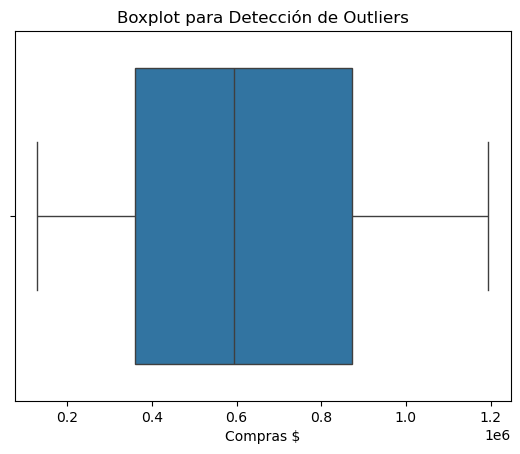

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df3['Compras $'])
plt.title('Boxplot para Detección de Outliers')
plt.show()

En el gráfico, no hay puntos fuera de los bigotes, lo que significa que no hay outliers detectados en la columna 'Compras $'.

4. Documentar las decisiones tomadas y cómo impactan en la
calidad del dataset.

Contamos con datos nulos en las columnas de 'Nombre Cliente', 'Comuna', 'Sector', 'Cód. Comuna', 'Provincia' y 'Región'. Esto se debe a que el archivo de excel tenia información incompleta respecto al 'Nombre' y 'Comuna' de los clientes. 

Al contar con el 'ID Cliente' se pueden diferenciar los clientes, por lo que para el ejercicio se pondrá en 'Nombre Cliente' la palabara 'Desconocido/a'. 

Adicionalmente, como no se contaba con la 'Comuna' de todos los clientes, no fue posible unir la información correctamente de las columnas 'Sector', 'Cód. Comuna', 'Provincia' y 'Región'. Por lo que, en el caso de 'Sector', 'Provincia' y 'Región' se completaron los valores nulos con 'Desconocido/a'. Como 'Cód. Comuna' es númerico, se completaron los valores nulos con '0'.

Respecto a la búsquedad de outliers, se utilizaron tres métodos: el método de Rango Intercuartil (IQR), el método de Z-score y Boxplot, y en todos los métodos no se encontraron outliers.

5. Guardar el DataFrame limpio para ser usado en la siguiente etapa.

In [189]:
df3.to_excel("df4.xlsx", index=False)

## **Lección 5 - *Data Wrangling***

🎯 Objetivo: Transformar y enriquecer los datos mediante técnicas de
manipulación avanzada.

1. Tomar el DataFrame limpio de la Lección 4.

In [190]:
df4 = pd.read_excel('df4.xlsx')
df4

,ID Cliente,Edad,Compras $,N°de Transacciones,Rango de Edad,Nombre Cliente,Comuna,Sector,Cód. Comuna,Provincia,Región
0,1,25,778688,9,18-24,Estrella Sevilla,Las Condes,Nororiente (Sector Oriente),13114,Santiago,Metropolitana de Santiago
1,2,50,404123,19,45-54,Brigida Guijarro,El Bosque,Sur,13105,Santiago,Metropolitana de Santiago
2,3,43,1145256,18,35-44,Julia Andres,Desconocido/a,Desconocido/a,0,Desconocido/a,Desconocido/a
3,4,28,784209,5,25-34,Marwa Zheng,Estación Central,Centro,13106,Santiago,Metropolitana de Santiago
4,5,35,1179103,3,25-34,Valentin Burgos,Providencia,Nororiente (Sector Oriente),13123,Santiago,Metropolitana de Santiago
5,6,29,210031,11,25-34,Rachid Palomares,Lo Espejo,Sur,13116,Santiago,Metropolitana de Santiago
6,7,73,516202,7,65-74,Eduard Molinero,Vitacura,Nororiente (Sector Oriente),13132,Santiago,Metropolitana de Santiago
7,8,61,135077,6,55-64,Azucena Cantero,Macul,Suroriente,13118,Santiago,Metropolitana de Santiago
8,9,20,131943,15,18-24,Mateo Beltran,Maipú,Surponiente,13119,Santiago,Metropolitana de Santiago
9,10,36,770686,2,35-44,Patricio Leiva,Desconocido/a,Desconocido/a,0,Desconocido/a,Desconocido/a


2. Aplicar técnicas de Data Wrangling:
- Eliminar registros duplicados.

In [191]:
# Verificar si hay filas duplicadas
df4.duplicated().sum()

np.int64(4)

Existen 4 filas duplicadas, las cuales serán eliminadas.

In [192]:
# Eliminar filas duplicadas
df4 = df4.drop_duplicates()

-  Transformar tipos de datos.

In [193]:
df5 = df4.copy()

# Verificar el tipo de datos de las columnas
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID Cliente          50 non-null     int64 
 1   Edad                50 non-null     int64 
 2   Compras $           50 non-null     int64 
 3   N°de Transacciones  50 non-null     int64 
 4   Rango de Edad       50 non-null     object
 5   Nombre Cliente      50 non-null     object
 6   Comuna              50 non-null     object
 7   Sector              50 non-null     object
 8   Cód. Comuna         50 non-null     int64 
 9   Provincia           50 non-null     object
 10  Región              50 non-null     object
dtypes: int64(5), object(6)
memory usage: 4.7+ KB


In [194]:
# Convertir columnas categoría
df5["Rango de Edad"] = df5["Rango de Edad"].astype("category")
df5["Comuna"] = df5["Comuna"].astype("category")
df5["Sector"] = df5["Sector"].astype("category")
df5["Cód. Comuna"] = df5["Cód. Comuna"].astype("category") # A pesar de ser numérica, es categórica
df5["Provincia"] = df5["Provincia"].astype("category")
df5["Región"] = df5["Región"].astype("category")

In [195]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID Cliente          50 non-null     int64   
 1   Edad                50 non-null     int64   
 2   Compras $           50 non-null     int64   
 3   N°de Transacciones  50 non-null     int64   
 4   Rango de Edad       50 non-null     category
 5   Nombre Cliente      50 non-null     object  
 6   Comuna              50 non-null     category
 7   Sector              50 non-null     category
 8   Cód. Comuna         50 non-null     category
 9   Provincia           50 non-null     category
 10  Región              50 non-null     category
dtypes: category(6), int64(4), object(1)
memory usage: 6.1+ KB


- Crear nuevas columnas calculadas.

In [196]:
# Clasificar clientes por frecuencia
df5["Frecuencia"] = pd.cut(
    df5["N°de Transacciones"],
    bins=[0, 3, 8, 20],
    labels=["Ocasional", "Frecuente", "Muy frecuente"]
)

# Ranking de clientes
df5["Ranking Compras"] = df5["Compras $"].rank(ascending=False).astype(int)

df5

,ID Cliente,Edad,Compras $,N°de Transacciones,Rango de Edad,Nombre Cliente,Comuna,Sector,Cód. Comuna,Provincia,Región,Frecuencia,Ranking Compras
0,1,25,778688,9,18-24,Estrella Sevilla,Las Condes,Nororiente (Sector Oriente),13114,Santiago,Metropolitana de Santiago,Muy frecuente,17
1,2,50,404123,19,45-54,Brigida Guijarro,El Bosque,Sur,13105,Santiago,Metropolitana de Santiago,Muy frecuente,33
2,3,43,1145256,18,35-44,Julia Andres,Desconocido/a,Desconocido/a,0,Desconocido/a,Desconocido/a,Muy frecuente,5
3,4,28,784209,5,25-34,Marwa Zheng,Estación Central,Centro,13106,Santiago,Metropolitana de Santiago,Frecuente,16
4,5,35,1179103,3,25-34,Valentin Burgos,Providencia,Nororiente (Sector Oriente),13123,Santiago,Metropolitana de Santiago,Ocasional,4
5,6,29,210031,11,25-34,Rachid Palomares,Lo Espejo,Sur,13116,Santiago,Metropolitana de Santiago,Muy frecuente,44
6,7,73,516202,7,65-74,Eduard Molinero,Vitacura,Nororiente (Sector Oriente),13132,Santiago,Metropolitana de Santiago,Frecuente,27
7,8,61,135077,6,55-64,Azucena Cantero,Macul,Suroriente,13118,Santiago,Metropolitana de Santiago,Frecuente,48
8,9,20,131943,15,18-24,Mateo Beltran,Maipú,Surponiente,13119,Santiago,Metropolitana de Santiago,Muy frecuente,49
9,10,36,770686,2,35-44,Patricio Leiva,Desconocido/a,Desconocido/a,0,Desconocido/a,Desconocido/a,Ocasional,18


- Aplicar funciones personalizadas (apply(), map(), lambda).

In [197]:
# Usar apply() para aplicar una función personalizada a una columna 'Descuento'
df5["Descuento"] = df5["Compras $"].apply(lambda x: int(x * 0.1) if x > 1000000 else 0)

In [198]:
# Usar map() para transformar los valores de una columna (función mapeada)
df5["Despacho"] = df5["Sector"].map({"Nororiente (Sector Oriente)": 1, "Suroriente": 1, "Centro": 2, "Norponiente (Sector Poniente)": 3, "Norte": 3, "Poniente": 4, "Sur": 5, "Surponiente":6, "Desconocido/a": 0})

df5

,ID Cliente,Edad,Compras $,N°de Transacciones,Rango de Edad,Nombre Cliente,Comuna,Sector,Cód. Comuna,Provincia,Región,Frecuencia,Ranking Compras,Descuento,Despacho
0,1,25,778688,9,18-24,Estrella Sevilla,Las Condes,Nororiente (Sector Oriente),13114,Santiago,Metropolitana de Santiago,Muy frecuente,17,0,1
1,2,50,404123,19,45-54,Brigida Guijarro,El Bosque,Sur,13105,Santiago,Metropolitana de Santiago,Muy frecuente,33,0,5
2,3,43,1145256,18,35-44,Julia Andres,Desconocido/a,Desconocido/a,0,Desconocido/a,Desconocido/a,Muy frecuente,5,114525,0
3,4,28,784209,5,25-34,Marwa Zheng,Estación Central,Centro,13106,Santiago,Metropolitana de Santiago,Frecuente,16,0,2
4,5,35,1179103,3,25-34,Valentin Burgos,Providencia,Nororiente (Sector Oriente),13123,Santiago,Metropolitana de Santiago,Ocasional,4,117910,1
5,6,29,210031,11,25-34,Rachid Palomares,Lo Espejo,Sur,13116,Santiago,Metropolitana de Santiago,Muy frecuente,44,0,5
6,7,73,516202,7,65-74,Eduard Molinero,Vitacura,Nororiente (Sector Oriente),13132,Santiago,Metropolitana de Santiago,Frecuente,27,0,1
7,8,61,135077,6,55-64,Azucena Cantero,Macul,Suroriente,13118,Santiago,Metropolitana de Santiago,Frecuente,48,0,1
8,9,20,131943,15,18-24,Mateo Beltran,Maipú,Surponiente,13119,Santiago,Metropolitana de Santiago,Muy frecuente,49,0,6
9,10,36,770686,2,35-44,Patricio Leiva,Desconocido/a,Desconocido/a,0,Desconocido/a,Desconocido/a,Ocasional,18,0,0


- Normalizar o discretizar columnas según sea necesario.

In [199]:
from sklearn.preprocessing import MinMaxScaler

# Aplicar la normalización sobre columna 'Compras $'
scaler = MinMaxScaler()
df5['compras_normalizadas'] = scaler.fit_transform(df5[['Compras $']])

# Verificar Normalización
df5[['Compras $', 'compras_normalizadas']]

,Compras $,compras_normalizadas
0,778688,0.609574
1,404123,0.257956
2,1145256,0.953685
3,784209,0.614756
4,1179103,0.985458
5,210031,0.075754
6,516202,0.363168
7,135077,0.005392
8,131943,0.002450
9,770686,0.602062


In [200]:
# Discretización de la columna 'Edad' en grupos etarios
# Definir los rangos y las etiquetas para la discretización
bins = [0, 17, 24, 40, 56, 75, 100]  # Rango de edades para cada generación
labels = ['Menores de edad', 'Generación Z', 'Millennials', 'Generación X', 'Baby Boomers', 'Silent Generation']  # Etiquetas para cada rango

# Discretizar la columna 'Edad' en generaciones, incluyendo menores de edad
df5['Generación'] = pd.cut(df5['Edad'], bins=bins, labels=labels, right=False)

3. Guardar la nueva versión del DataFrame optimizado.

In [201]:
df5

,ID Cliente,Edad,Compras $,N°de Transacciones,Rango de Edad,Nombre Cliente,Comuna,Sector,Cód. Comuna,Provincia,Región,Frecuencia,Ranking Compras,Descuento,Despacho,compras_normalizadas,Generación
0,1,25,778688,9,18-24,Estrella Sevilla,Las Condes,Nororiente (Sector Oriente),13114,Santiago,Metropolitana de Santiago,Muy frecuente,17,0,1,0.609574,Millennials
1,2,50,404123,19,45-54,Brigida Guijarro,El Bosque,Sur,13105,Santiago,Metropolitana de Santiago,Muy frecuente,33,0,5,0.257956,Generación X
2,3,43,1145256,18,35-44,Julia Andres,Desconocido/a,Desconocido/a,0,Desconocido/a,Desconocido/a,Muy frecuente,5,114525,0,0.953685,Generación X
3,4,28,784209,5,25-34,Marwa Zheng,Estación Central,Centro,13106,Santiago,Metropolitana de Santiago,Frecuente,16,0,2,0.614756,Millennials
4,5,35,1179103,3,25-34,Valentin Burgos,Providencia,Nororiente (Sector Oriente),13123,Santiago,Metropolitana de Santiago,Ocasional,4,117910,1,0.985458,Millennials
5,6,29,210031,11,25-34,Rachid Palomares,Lo Espejo,Sur,13116,Santiago,Metropolitana de Santiago,Muy frecuente,44,0,5,0.075754,Millennials
6,7,73,516202,7,65-74,Eduard Molinero,Vitacura,Nororiente (Sector Oriente),13132,Santiago,Metropolitana de Santiago,Frecuente,27,0,1,0.363168,Baby Boomers
7,8,61,135077,6,55-64,Azucena Cantero,Macul,Suroriente,13118,Santiago,Metropolitana de Santiago,Frecuente,48,0,1,0.005392,Baby Boomers
8,9,20,131943,15,18-24,Mateo Beltran,Maipú,Surponiente,13119,Santiago,Metropolitana de Santiago,Muy frecuente,49,0,6,0.002450,Generación Z
9,10,36,770686,2,35-44,Patricio Leiva,Desconocido/a,Desconocido/a,0,Desconocido/a,Desconocido/a,Ocasional,18,0,0,0.602062,Millennials


In [202]:
df5.to_excel("df5.xlsx", index=False)

## **Lección 6 - *Agrupamiento y Pivoteo de Datos***

🎯 Objetivo: Organizar y estructurar los datos para el análisis utilizando técnicas de agrupamiento y pivotado.

1. Tomar el DataFrame final de la Lección 5.

In [203]:
df6 = pd.read_excel('df5.xlsx')

2. Aplicar técnicas de agrupamiento (groupby()) para obtener métricas resumidas.

In [204]:
# Agrupar por 'Sector' y calcular la suma de 'Compras $'
grupo_sector = df6.groupby('Sector')['Compras $'].sum()
grupo_sector

Sector
Centro                           3933386
Desconocido/a                    3909101
Nororiente (Sector Oriente)      5398434
Norponiente (Sector Poniente)    3281608
Norte                            7005449
Sur                              3045507
Suroriente                       1222150
Surponiente                      2986855
Name: Compras $, dtype: int64

In [205]:
# Agrupar por 'Rango de Edad' y calcular la suma de 'Compras $'
grupo_rango = df6.groupby('Rango de Edad')['Compras $'].sum()
grupo_rango

Rango de Edad
18-24    1591560
25-34    6522132
35-44    6420549
45-54    2549335
55-64    7534447
65-74    6164467
Name: Compras $, dtype: int64

In [206]:
# Agrupar por 'Generación' y calcular la suma de 'Compras $'
grupo_generacion = df6.groupby('Generación')['Compras $'].sum()
grupo_generacion

Generación
Baby Boomers    13698914
Generación X     7093858
Generación Z      812872
Millennials      9176846
Name: Compras $, dtype: int64

3. Reestructurar los datos utilizando pivot() y melt().

In [210]:
# Pivotar los datos para cada 'Rango de Edad' vs 'Despacho'
df_pivot = df6.pivot_table(index='Rango de Edad', columns='Despacho', values='Compras $', aggfunc='sum')
df_pivot.head()

Despacho,0,1,2,3,5,6
Rango de Edad,,,,,,
18-24,NaN,1267381.0,192236.0,NaN,NaN,131943.0
25-34,NaN,2155726.0,784209.0,2647844.0,210031.0,724322.0
35-44,2801690.0,680299.0,268920.0,2028326.0,335626.0,305688.0
45-54,NaN,853503.0,NaN,1291709.0,404123.0,NaN
55-64,1107411.0,135077.0,2180449.0,2056086.0,1077157.0,978267.0


In [208]:
# Reestructurar los datos usando melt
df_melted = df6.melt(id_vars=['Comuna', 'Sector'], value_vars=['Compras $', 'N°de Transacciones'], 
                          var_name='Tipo de dato', value_name='Valor')
df_melted

,Comuna,Sector,Tipo de dato,Valor
0,Las Condes,Nororiente (Sector Oriente),Compras $,778688
1,El Bosque,Sur,Compras $,404123
2,Desconocido/a,Desconocido/a,Compras $,1145256
3,Estación Central,Centro,Compras $,784209
4,Providencia,Nororiente (Sector Oriente),Compras $,1179103
...,...,...,...,...
95,Cerro Navia,Norponiente (Sector Poniente),N°de Transacciones,2
96,Lo Prado,Norponiente (Sector Poniente),N°de Transacciones,6
97,Padre Hurtado,Surponiente,N°de Transacciones,18
98,Peñaflor,Surponiente,N°de Transacciones,2


4. Combinar nuevas fuentes de ser necesario con merge() y concat().

No es necesario.

5. Exportar el DataFrame final listo para análisis en formatos CSV y Excel.

In [209]:
df6.to_excel("df6.xlsx", index=False)
df6.to_csv("df6.csv", index=False, encoding="utf-8")